<a href="https://colab.research.google.com/github/VictorYuzoBR/learning-phyton/blob/main/SeabornScikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local/miniconda
!rm Miniconda3-latest-Linux-x86_64.sh

In [ ]:
import sys
import os
sys.path.append('/usr/local/miniconda/bin')
os.environ['PATH'] = '/usr/local/miniconda/bin:' + os.environ['PATH']

In [ ]:
!conda --version

In [ ]:
!conda create -y --name myenv python=3.8
!source activate myenv

In [ ]:
!source deactivate

In [ ]:
!source activate myenv

In [ ]:
!conda install -y numpy scipy pandas matplotlib scikit-learn

In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.impute import SimpleImputer
print("Instalações bem-sucedidas!")

Instalações bem-sucedidas!


1. Remover valores ausentes da coluna embarked e substitu´ı-los pela moda.
2. Criar gr´aficos de contagem para as vari´aveis pclass e survived.
3. Aplicar o RobustScaler nas colunas age e fare.
4. Criar um gr´afico de dispers˜ao entre fare e age, separado por sexo e classe.
5. Criar um boxplot da vari´avel age separada por pclass e survived.
6. Detectar e remover outliers da coluna age.
7. Criar um gr´afico de barras mostrando a m´edia da idade por sexo e classe.
8
8. Aplicar One-hot encoding na vari´avel pclass.
9. Criar gr´aficos de dispers˜ao para as vari´aveis fare, age e pclass usando
pairplot.
10. Usar o m´etodo train test split() para dividir os dados em treino (70%)
e teste (30%).

In [ ]:
df = sns.load_dataset("titanic")
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
print(df[df["embarked"].isnull()])

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True  


In [ ]:
print(df["embarked"][61])
print(df["embarked"][829])

nan
nan


In [ ]:

imputer = SimpleImputer(strategy='most_frequent')


df[['embarked']] = imputer.fit_transform(df[['embarked']])

In [ ]:
print(df["embarked"][61])
print(df["embarked"][829])

S
S


<Axes: xlabel='survived', ylabel='count'>

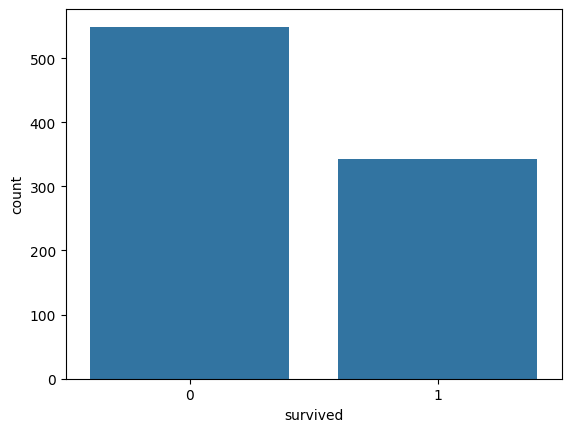

In [ ]:
sns.countplot(x="survived", data=df)

<Axes: xlabel='pclass', ylabel='count'>

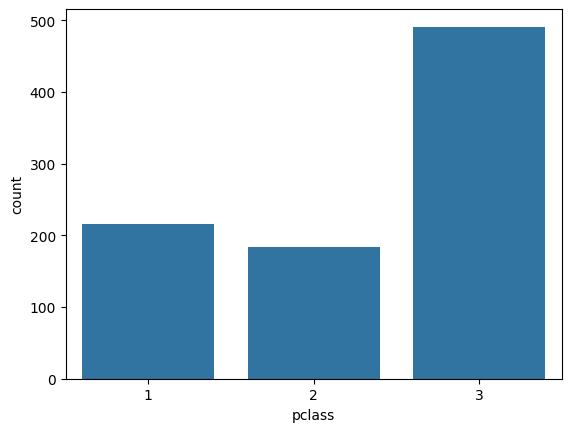

In [ ]:
sns.countplot(x="pclass", data=df)

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df[["age"]])
df[["age"]]= transformer.transform(df[["age"]])


In [ ]:
print(df["age"])

0     -0.335664
1      0.559441
2     -0.111888
3      0.391608
4      0.391608
         ...   
886   -0.055944
887   -0.503497
888         NaN
889   -0.111888
890    0.223776
Name: age, Length: 891, dtype: float64


In [ ]:
transformer = RobustScaler().fit(df[["fare"]])
df[["fare"]]= transformer.transform(df[["fare"]])

In [ ]:
print(df["fare"])

0     -0.312011
1      2.461242
2     -0.282777
3      1.673732
4     -0.277363
         ...   
886   -0.062981
887    0.673281
888    0.389604
889    0.673281
890   -0.290356
Name: fare, Length: 891, dtype: float64


<Axes: xlabel='fare', ylabel='age'>

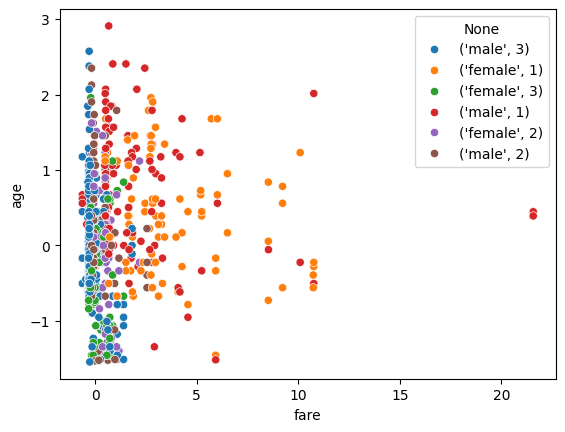

In [ ]:
sns.scatterplot(x="fare",y="age",data=df,hue=df[['sex', 'pclass']].apply(tuple, axis=1))

In [ ]:
print(df[['sex', 'pclass']].apply(tuple, axis=1))

0        (male, 3)
1      (female, 1)
2      (female, 3)
3      (female, 1)
4        (male, 3)
          ...     
886      (male, 2)
887    (female, 1)
888    (female, 3)
889      (male, 1)
890      (male, 3)
Length: 891, dtype: object


<Axes: xlabel='age'>

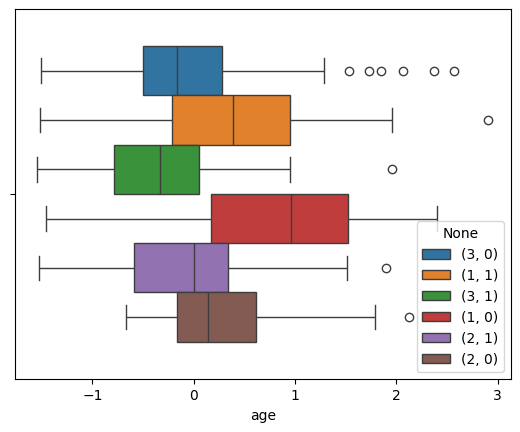

In [ ]:
sns.boxplot(x="age",data=df,hue=df[["pclass","survived"]].apply(tuple,axis=1))

In [ ]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3-q1
df = df[((df["age"] < (q1 - 1.5 * iqr)) | (df["age"] > (q3 + 1.5 * iqr)))]
print(df)

     survived  pclass   sex       age  sibsp  parch      fare embarked  \
33          0       2  male  2.125874      0      0 -0.171255        S   
54          0       1  male  2.069930      0      1  2.058286        C   
96          0       1  male  2.405594      0      0  0.874853        C   
116         0       3  male  2.377622      0      0 -0.290356        Q   
280         0       3  male  2.069930      0      0 -0.290356        Q   
456         0       1  male  2.069930      0      0  0.523864        S   
493         0       1  male  2.405594      0      0  1.517999        C   
630         1       1  male  2.909091      0      0  0.673281        S   
672         0       2  male  2.349650      0      0 -0.171255        S   
745         0       1  male  2.349650      1      1  2.448973        S   
851         0       3  male  2.573427      0      0 -0.289273        S   

      class  who  adult_male deck  embark_town alive  alone  
33   Second  man        True  NaN  Southampton   

<Axes: xlabel='age'>

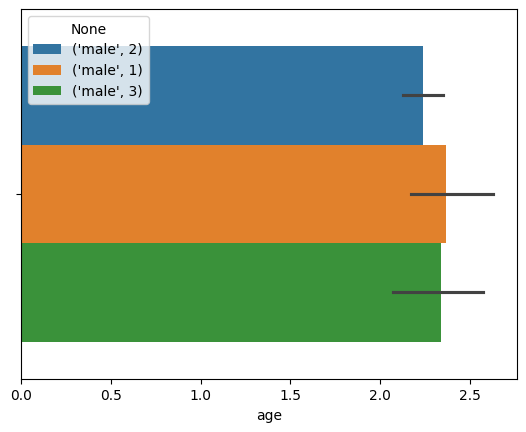

In [ ]:
sns.barplot(x="age",data=df,hue=df[["sex","pclass"]].apply(tuple,axis=1))

In [ ]:
df2 = pd.get_dummies(df, columns=["pclass"], drop_first=True)

print(df2)

     survived   sex       age  sibsp  parch      fare embarked   class  who  \
33          0  male  2.125874      0      0 -0.171255        S  Second  man   
54          0  male  2.069930      0      1  2.058286        C   First  man   
96          0  male  2.405594      0      0  0.874853        C   First  man   
116         0  male  2.377622      0      0 -0.290356        Q   Third  man   
280         0  male  2.069930      0      0 -0.290356        Q   Third  man   
456         0  male  2.069930      0      0  0.523864        S   First  man   
493         0  male  2.405594      0      0  1.517999        C   First  man   
630         1  male  2.909091      0      0  0.673281        S   First  man   
672         0  male  2.349650      0      0 -0.171255        S  Second  man   
745         0  male  2.349650      1      1  2.448973        S   First  man   
851         0  male  2.573427      0      0 -0.289273        S   Third  man   

     adult_male deck  embark_town alive  alone  pcl

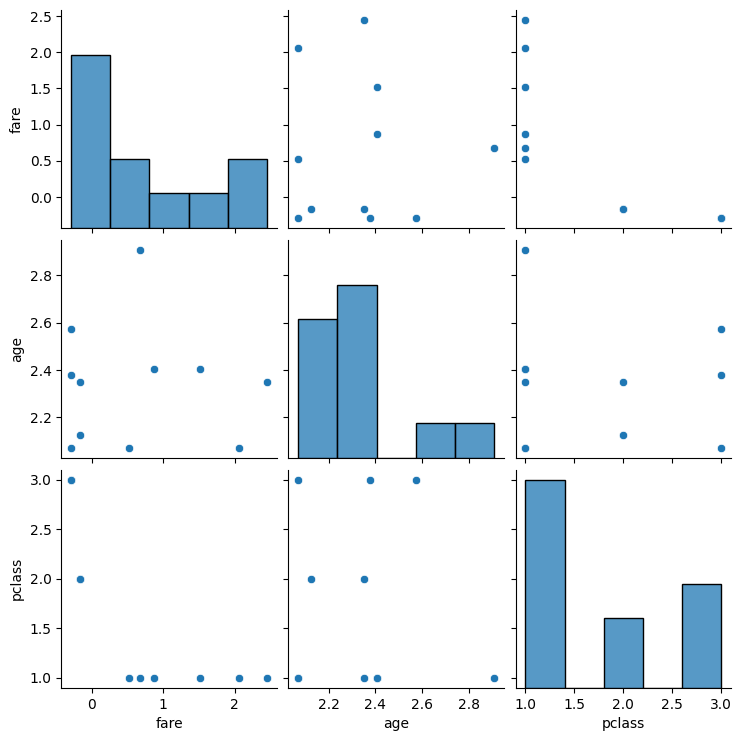

In [ ]:
sns.pairplot(df[["fare","age","pclass"]])

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns="survived")
y = df["survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print(x_train)

     pclass   sex       age  sibsp  parch      fare embarked   class  who  \
96        1  male  2.405594      0      0  0.874853        C   First  man   
54        1  male  2.069930      0      1  2.058286        C   First  man   
672       2  male  2.349650      0      0 -0.171255        S  Second  man   
280       3  male  2.069930      0      0 -0.290356        Q   Third  man   
630       1  male  2.909091      0      0  0.673281        S   First  man   
116       3  male  2.377622      0      0 -0.290356        Q   Third  man   
493       1  male  2.405594      0      0  1.517999        C   First  man   

     adult_male deck  embark_town alive  alone  
96         True    A    Cherbourg    no   True  
54         True    B    Cherbourg    no  False  
672        True  NaN  Southampton    no   True  
280        True  NaN   Queenstown    no   True  
630        True    A  Southampton   yes   True  
116        True  NaN   Queenstown    no   True  
493        True  NaN    Cherbourg    no 

In [ ]:
print(x_test)

     pclass   sex       age  sibsp  parch      fare embarked   class  who  \
456       1  male  2.069930      0      0  0.523864        S   First  man   
33        2  male  2.125874      0      0 -0.171255        S  Second  man   
745       1  male  2.349650      1      1  2.448973        S   First  man   
851       3  male  2.573427      0      0 -0.289273        S   Third  man   

     adult_male deck  embark_town alive  alone  
456        True    E  Southampton    no   True  
33         True  NaN  Southampton    no   True  
745        True    B  Southampton    no  False  
851        True  NaN  Southampton    no   True  


In [ ]:
print(y_train)

96     0
54     0
672    0
280    0
630    1
116    0
493    0
Name: survived, dtype: int64


In [ ]:
print(y_test)

456    0
33     0
745    0
851    0
Name: survived, dtype: int64
